In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import networkx as nx
from helpers import eig
from sklearn.cluster import KMeans

# Exercise 4

(1000, 1)
(784, 1000)


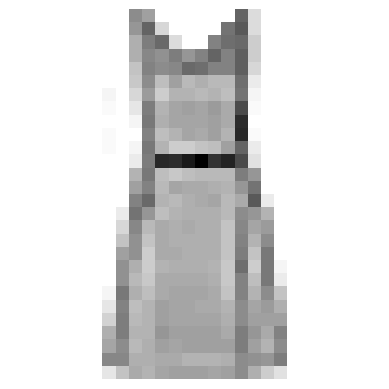

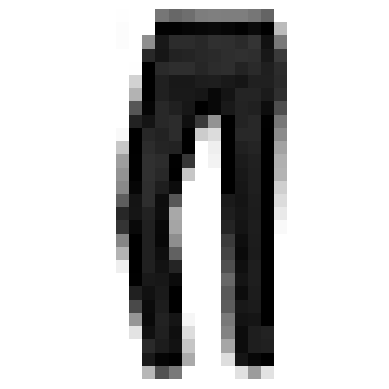

In [32]:
mat = scipy.io.loadmat('hw2_zalando_new.mat')

correct = mat['correct']
items = mat['items']

print(correct.shape)
print(items.shape)


def zalando_plot(z):
    n = 28  # Image size
    A = np.reshape(z, (n, n))

    # Normalize it
    I = np.argmax(np.abs(z))
    za = z[I]
    A = A / za

    B = 1 - A # It looks nicer with a white background.

    # Plot
    plt.imshow(B, cmap='gray', origin='upper')
    plt.axis('off')
    plt.show()

zalando_plot(items[:,0])
zalando_plot(items[:,1])


Clearly pants and dresses are the two items in the dataset

In [75]:
def build_distance(items, w):
    w_items = items * w
    w_items = w_items.T
    S = np.sqrt(np.sum((w_items[:, None, :] - w_items[None, :, :])**2, axis=2))
    return S

w = 2* np.ones((items[:,1].shape[0],1))
S = build_distance(items, w)


### B)

[[ 0.         19.84326126 18.19364926 ... 11.42015189 16.62945974
  21.46080142]
 [19.84326126  0.         11.31351004 ... 16.70268219 16.56141159
   6.29239608]
 [18.19364926 11.31351004  0.         ... 14.91501802 12.8908755
  12.3928394 ]
 ...
 [11.42015189 16.70268219 14.91501802 ...  0.         11.60357102
  18.19299162]
 [16.62945974 16.56141159 12.8908755  ... 11.60357102  0.
  17.90789026]
 [21.46080142  6.29239608 12.3928394  ... 18.19299162 17.90789026
   0.        ]]


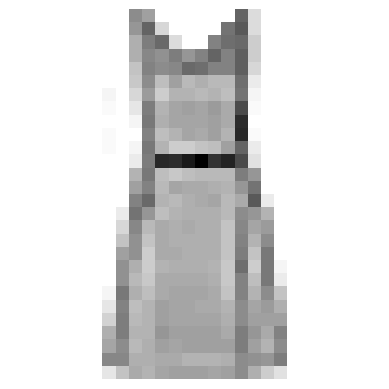

In [77]:
# First item:
print(S)
zalando_plot(items[:,0])

In [67]:
index = np.argmin(S[1,1:])
print(S[1,:])
print(index)
S2 = build_distance(items[:,:5], w = np.ones((784,1)))
print(S2.shape)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.84313725e-03
 3.14802074e-01 6.19855994e-01 2.06369918e+00 3.16651065e+00
 6.83039546e+00 1.85823868e+01 2.89395260e+01 3.24761386e+01
 2.93888580e+01 2.75029670e+01 2.60960613e+01 2.82612027e+01
 3.15684910e+01 3.02189687e+01 2.77770804e+01 2.05277333e+01
 6.36327410e+00 2.51284130e+00 1.13787677e+00 4.30230217e-01
 1.10918711e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.56862745e-02
 1.31423461e+00 2.46651391e+00 5.33433670e+00 9.85498545e+00
 2.13020561e+01 3.50025692e+01 4.33021980e+01 4.56012262e+01
 4.81341800e+01 4.90038896e+01 4.86582401e+01 4.83555765e+01
 4.64800308e+01 4.26211024e+01 4.28136396e+01 3.62924200e+01
 1.59058205e+01 7.27157385e+00 3.30212845e+00 1.85209338e+00
 3.92235286e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.25607245e-01
 1.25485294e+00 3.40384928e+00 8.72511213e+00 1.45206192e+01
 2.38760828e+01 3.435074